In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Parkinsons Data.data", sep=",").drop("name",axis=1)
len(data.columns)

23

In [ ]:
data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

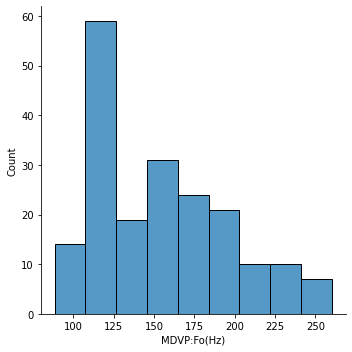

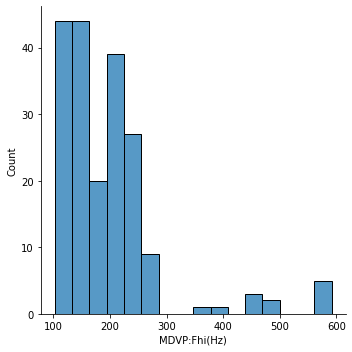

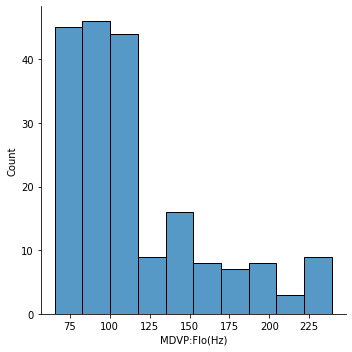

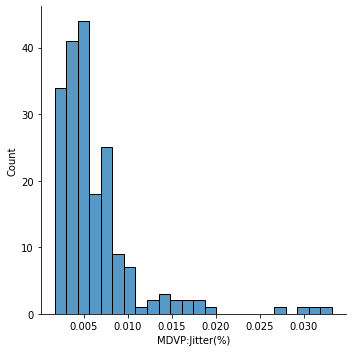

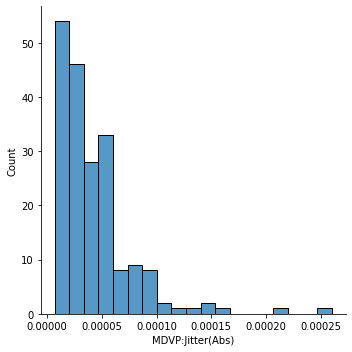

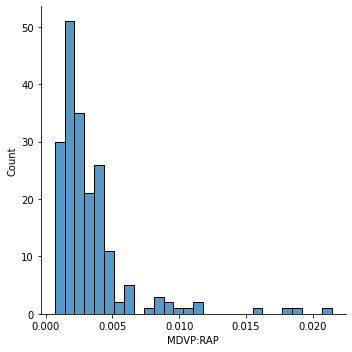

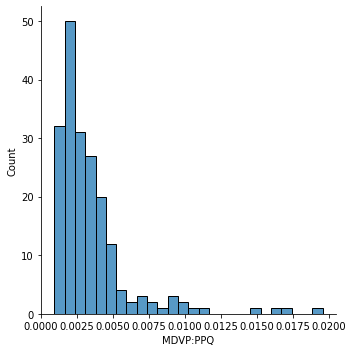

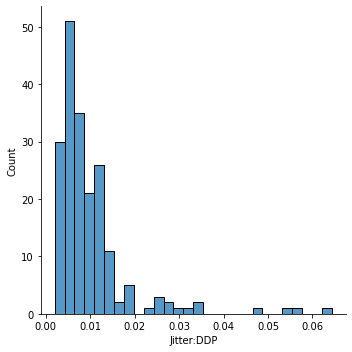

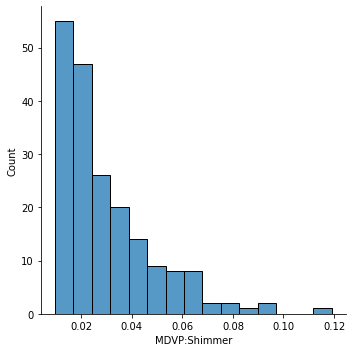

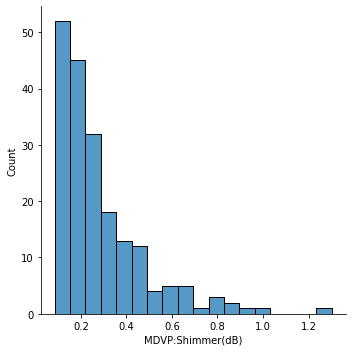

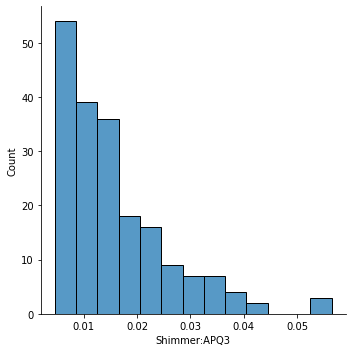

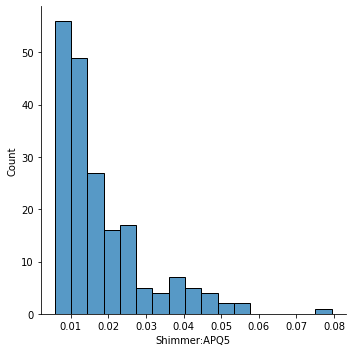

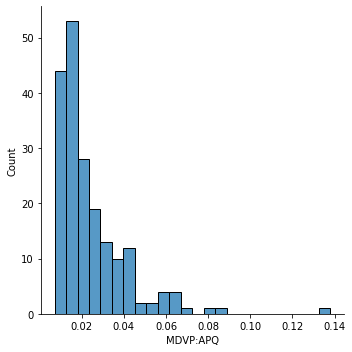

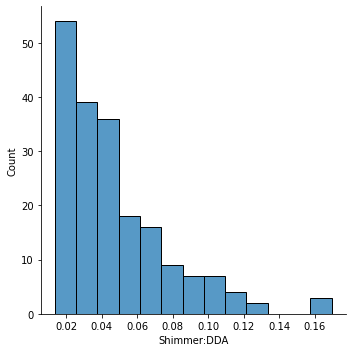

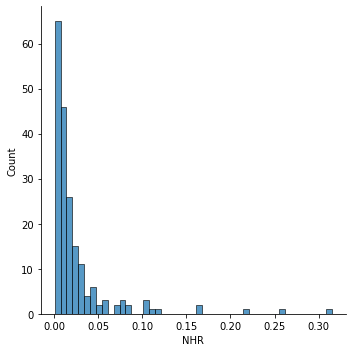

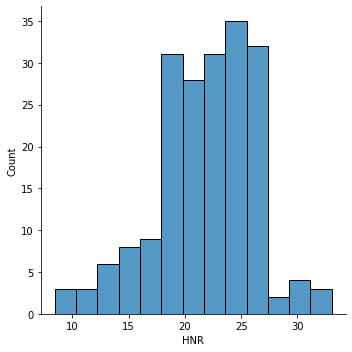

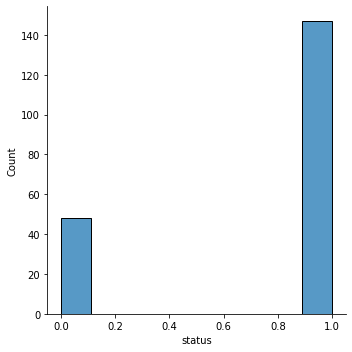

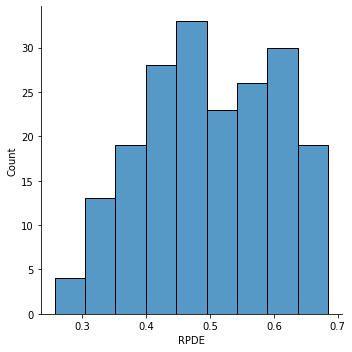

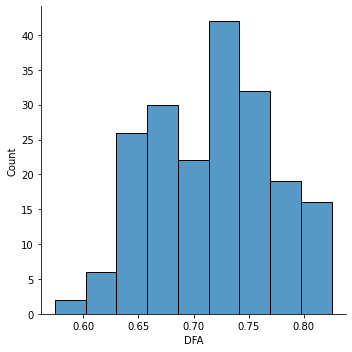

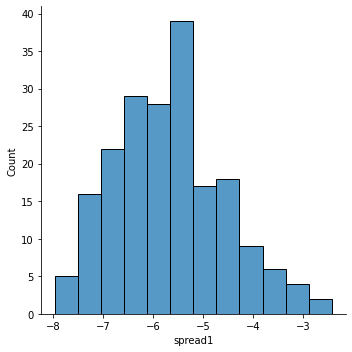

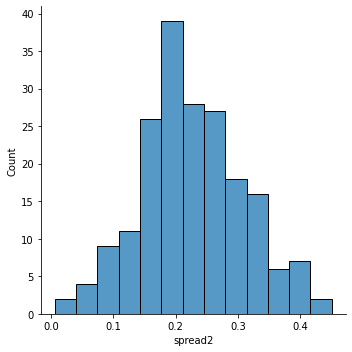

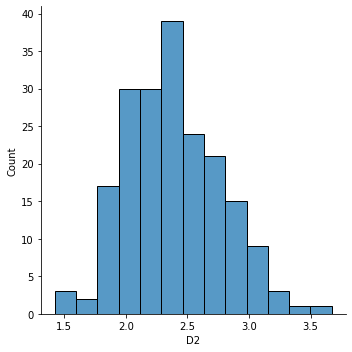

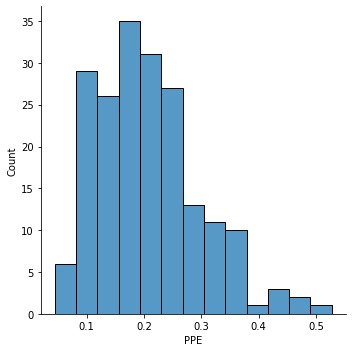

In [ ]:
from seaborn.widgets import plt
#
for i in data:
  #plt.title(i)
  sns.displot(data=data[i])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


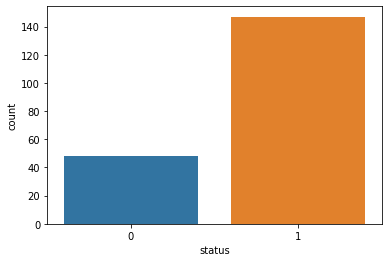

In [ ]:
# From the bar plot it could be understood that our dataset is imbalanced.
sns.countplot(data['status'])

In [ ]:
 #splitting the data into test train
scaler=StandardScaler()
train, test = train_test_split(data, test_size = 0.5, random_state = 42)
x_train= train.drop('status',axis=1)
x_test= test.drop('status',axis=1)
y_train= train['status']
y_test= test['status']
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)




In [ ]:
x_train

array([[-0.80366084, -0.39998852, -0.99275   , ...,  0.48790584,
        -0.20781392,  0.79643104],
       [-0.87767898, -0.53619526, -0.40322806, ...,  0.02434327,
        -1.26919669, -0.44524953],
       [ 0.89637837,  0.2260786 ,  1.15912568, ...,  1.34655128,
         2.20335071,  2.16536916],
       ...,
       [-0.10311428, -0.3184194 ,  0.59900179, ..., -1.73917422,
        -0.10156566, -0.20647817],
       [-0.10630985, -0.41399545,  0.42734368, ...,  0.1686705 ,
         1.13884693, -0.14271658],
       [-0.32724955,  4.15507428, -1.20182381, ...,  0.53975493,
         0.756914  ,  2.4323076 ]])

In [ ]:
#Based on the value counts of the classes, we  can see that our dataset is imbalanced. Hence, applying SMOTE over sampling technique to increase the size of the minority class.

sm = BorderlineSMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(x_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


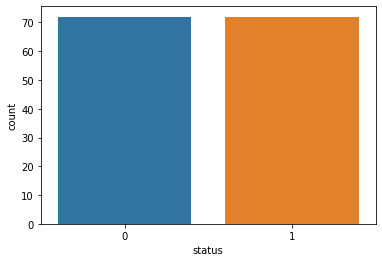

In [ ]:
sns.countplot(oversampled['status'])

In [ ]:

#Grid Search CV
param_grid = [
    {
     'penalty' : ['l1'],
    'C' : np.logspace(-4, 4, 20),
    'solver': ['liblinear']}
]


lasso_log= GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, refit=True)
best_model= lasso_log.fit(oversampled_X,oversampled_Y )
train_predict= best_model.predict(oversampled_X)
predict= best_model.predict(x_test)
print(classification_report(y_test, predict))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.60      0.78      0.68        23
           1       0.93      0.84      0.88        75

    accuracy                           0.83        98
   macro avg       0.76      0.81      0.78        98
weighted avg       0.85      0.83      0.83        98



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.86      0.86        72
           1       0.86      0.85      0.85        72

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144

85.41666666666666


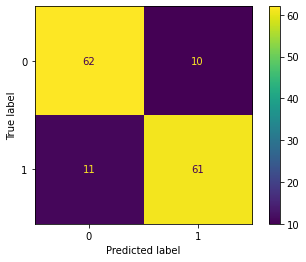

In [ ]:
#training accuracy
accuracy_train = accuracy_score(oversampled_Y,train_predict)*100
plot_confusion_matrix(best_model,oversampled_X, oversampled_Y)
print(classification_report(oversampled_Y,train_predict))
print(accuracy_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


82.6530612244898
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        23
           1       0.93      0.84      0.88        75

    accuracy                           0.83        98
   macro avg       0.76      0.81      0.78        98
weighted avg       0.85      0.83      0.83        98



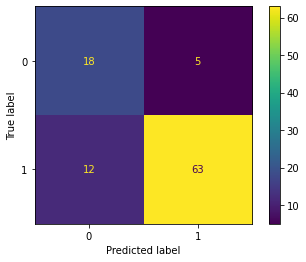

In [ ]:
#testing accuracy
accuracy_test = accuracy_score(y_test,predict)*100
plot_confusion_matrix(best_model,x_test, y_test)
print(accuracy_test)
print(classification_report(y_test, predict))

In [ ]:
best_model.best_params_



{'C': 4.281332398719396, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
sel_ = SelectFromModel(LogisticRegression(C=4.281332398719396, penalty='l1', solver='liblinear'))
sel_.fit(x_train, y_train)
sel_.n_


22

In [ ]:
xt_df= pd.DataFrame(x_train)
removed_feats = xt_df.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Int64Index([4, 6, 8, 9, 10, 11, 13, 14], dtype='int64')

In [ ]:

train=data.drop('status',axis=1)
col_names= list(train.columns)
for i in removed_feats:
  col_names.pop(i)
col_names
  

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ5',
 'Shimmer:DDA',
 'HNR',
 'DFA',
 'spread1',
 'D2']

In [ ]:
col_names[1]

'MDVP:Fhi(Hz)'

SVM

In [ ]:
#Grid search for Polynomial Kernel
'''param_grid = {
     'kernel':['poly'],
    'C': [0.01, 0.1, 1,10],
    'degree':[1,2,3,4,5]
    }
{'C': 1, 'degree': 3, 'kernel': 'poly'} '''
'''param_grid = {
     'kernel':['rbf'],
    'C': [0.01, 0.1, 1, 10],
    'gamma':['auto','scale']
    }  
    {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}'''
param_grid = {
     'kernel':['linear'],
    'C': [0.01, 0.1, 1, 10]
    }


svm_param= GridSearchCV(SVC(), param_grid=param_grid, cv=5, refit=True)
svm_param.fit(oversampled_X,oversampled_Y)
svm_param.best_params_


{'C': 1, 'kernel': 'linear'}

In [ ]:
svm_model= SVC(C=5.7, kernel= 'rbf',gamma='scale')
svm_model.fit(oversampled_X,oversampled_Y)
svm_train= svm_model.predict(oversampled_X)
svm_predict= svm_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.92      0.96        72

    accuracy                           0.96       144
   macro avg       0.96      0.96      0.96       144
weighted avg       0.96      0.96      0.96       144

95.83333333333334


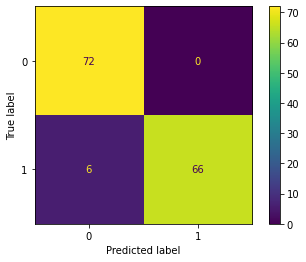

In [ ]:
#Training Accuracy
accuracy_train = accuracy_score(oversampled_Y,svm_train)*100
plot_confusion_matrix(svm_model,oversampled_X, oversampled_Y)
print(classification_report(oversampled_Y,svm_train))
print(accuracy_train)

92.85714285714286
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.97      0.93      0.95        75

    accuracy                           0.93        98
   macro avg       0.89      0.92      0.90        98
weighted avg       0.93      0.93      0.93        98



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


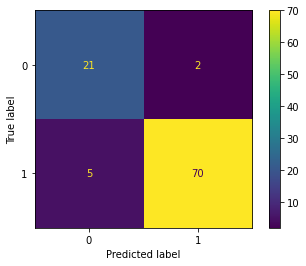

In [ ]:
#testing accuracy
accuracy_test = accuracy_score(y_test,svm_predict)*100
plot_confusion_matrix(svm_model,x_test, y_test)
print(accuracy_test)
print(classification_report(y_test, svm_predict))

QDA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


99.30555555555556


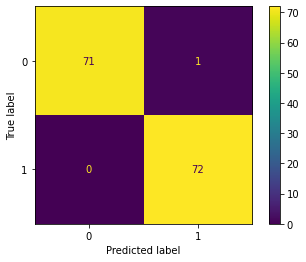

In [ ]:
col_names[1]

#fitting a QDA model
lda= QuadraticDiscriminantAnalysis()
lda.fit(oversampled_X,oversampled_Y)
lda_train_ypred=lda.predict(oversampled_X)

accuracy_train = accuracy_score(oversampled_Y,lda_train_ypred)*100
plot_confusion_matrix(lda,oversampled_X, oversampled_Y)
print(accuracy_train)


In [ ]:
test_pred=test.drop("status",axis=1)
label_test= test["status"]

0.8163265306122449


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


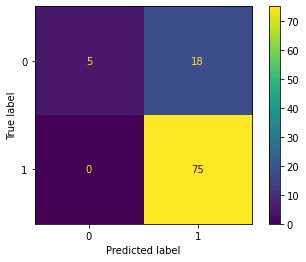

In [ ]:
qda_test_pred=lda.predict(test_pred)
accuracy_test=accuracy_score(label_test,qda_test_pred)
print(accuracy_test)
plot_confusion_matrix(lda,test_pred, label_test)

In [ ]:
score=[]
T= np.linspace(1000,10000,num=10, dtype=int)
#T=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
for i in T:
    gbc= GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=i)
    cross_score= cross_val_score(gbc,x_train, y_train, cv=5, scoring='accuracy')
    score.append(np.mean(cross_score))